## Load data and import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
bikes_df = pd.read_csv('hour.csv')


## Renaming Columns

In [5]:
bikes_df.columns
bikes_df.rename(columns={'instant': 'index'}, inplace = True)
bikes_df.rename(columns={'dteday': 'date'}, inplace = True)
bikes_df.rename(columns={'hr': 'hour'}, inplace = True)
bikes_df.rename(columns={'temp': 'temperature'}, inplace = True)
bikes_df.rename(columns={'atemp': 'adjusted_temperature'}, inplace = True)
bikes_df.rename(columns={'cnt': 'total_users'}, inplace = True)
bikes_df.rename(columns={'yr': 'year'}, inplace = True)

print(bikes_df.info())

df1 = bikes_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 17379 non-null  int64  
 1   date                  17379 non-null  object 
 2   season                17379 non-null  int64  
 3   year                  17379 non-null  int64  
 4   mnth                  17379 non-null  int64  
 5   hour                  17379 non-null  int64  
 6   holiday               17379 non-null  int64  
 7   weekday               17379 non-null  int64  
 8   workingday            17379 non-null  int64  
 9   weathersit            17379 non-null  int64  
 10  temperature           17379 non-null  float64
 11  adjusted_temperature  17379 non-null  float64
 12  hum                   17379 non-null  float64
 13  windspeed             17379 non-null  float64
 14  casual                17379 non-null  int64  
 15  registered         

## Changing column year into 2011 and 2012


In [7]:

def map_year(year):
    if year == 0:
        return 2011
    elif year == 1:
        return 2012
    else:
        return year  

df1['year'] = df1['year'].apply(map_year)


print(df1)

df2=df1.copy()

       index        date  season  year  mnth  hour  holiday  weekday  \
0          1  2011-01-01       1  2011     1     0        0        6   
1          2  2011-01-01       1  2011     1     1        0        6   
2          3  2011-01-01       1  2011     1     2        0        6   
3          4  2011-01-01       1  2011     1     3        0        6   
4          5  2011-01-01       1  2011     1     4        0        6   
...      ...         ...     ...   ...   ...   ...      ...      ...   
17374  17375  2012-12-31       1  2012    12    19        0        1   
17375  17376  2012-12-31       1  2012    12    20        0        1   
17376  17377  2012-12-31       1  2012    12    21        0        1   
17377  17378  2012-12-31       1  2012    12    22        0        1   
17378  17379  2012-12-31       1  2012    12    23        0        1   

       workingday  weathersit  temperature  adjusted_temperature   hum  \
0               0           1         0.24                0.2

## Changing column season to winter, spring, sumer, fall

In [14]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df2['season'] = df2['season'].map(season_mapping)
print(df2)

df3=df2.copy()

       index        date  season  year  mnth  hour  holiday  weekday  \
0          1  2011-01-01  Winter  2011     1     0        0        6   
1          2  2011-01-01  Winter  2011     1     1        0        6   
2          3  2011-01-01  Winter  2011     1     2        0        6   
3          4  2011-01-01  Winter  2011     1     3        0        6   
4          5  2011-01-01  Winter  2011     1     4        0        6   
...      ...         ...     ...   ...   ...   ...      ...      ...   
17374  17375  2012-12-31  Winter  2012    12    19        0        1   
17375  17376  2012-12-31  Winter  2012    12    20        0        1   
17376  17377  2012-12-31  Winter  2012    12    21        0        1   
17377  17378  2012-12-31  Winter  2012    12    22        0        1   
17378  17379  2012-12-31  Winter  2012    12    23        0        1   

       workingday  weathersit  temperature  adjusted_temperature   hum  \
0               0           1         0.24                0.2

## Identifying some trends :  Top 10 days with higher user rate,  Top 10 days with lowest user rate, average of users per season

In [16]:
"""
    CALCULATING THE TOP TEN DAYS WITH HIGHEST TOTAL_USERS RATE
"""

highest_date = df3.nlargest(10, 'total_users')
display("Highest Rider Dates:")
display(highest_date)

'Highest Rider Dates:'

,index,date,season,year,mnth,hour,holiday,weekday,workingday,weathersit,temperature,adjusted_temperature,hum,windspeed,casual,registered,total_users
14773,14774,2012-09-12,Summer,2012,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,Summer,2012,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,Summer,2012,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,Summer,2012,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,Fall,2012,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
15780,15781,2012-10-24,Fall,2012,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
10622,10623,2012-03-23,Spring,2012,3,17,0,5,1,2,0.72,0.6515,0.42,0.1642,264,693,957
15108,15109,2012-09-26,Fall,2012,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953
15444,15445,2012-10-10,Fall,2012,10,17,0,3,1,1,0.58,0.5455,0.43,0.2239,91,857,948
15588,15589,2012-10-16,Fall,2012,10,17,0,2,1,1,0.52,0.5000,0.39,0.1940,104,839,943


In [18]:
"""
    CALCULATING THE TOP TEN WITH THE LOWEST TOTAL_USERS RATE
"""

lowest_date = df3.nsmallest(10, 'total_users')
display("Lowest Rider Dates:")
display(lowest_date)

'Lowest Rider Dates:'

,index,date,season,year,mnth,hour,holiday,weekday,workingday,weathersit,temperature,adjusted_temperature,hum,windspeed,casual,registered,total_users
4,5,2011-01-01,Winter,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,Winter,2011,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
30,31,2011-01-02,Winter,2011,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1
49,50,2011-01-03,Winter,2011,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,1,1
71,72,2011-01-04,Winter,2011,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,0,1,1
118,119,2011-01-06,Winter,2011,1,4,0,4,1,2,0.16,0.1970,0.64,0.0896,0,1,1
140,141,2011-01-07,Winter,2011,1,2,0,5,1,2,0.20,0.1970,0.69,0.2239,0,1,1
141,142,2011-01-07,Winter,2011,1,4,0,5,1,2,0.20,0.2121,0.69,0.1343,0,1,1
165,166,2011-01-08,Winter,2011,1,4,0,6,0,3,0.18,0.1970,0.55,0.1642,0,1,1
189,190,2011-01-09,Winter,2011,1,4,0,0,0,1,0.08,0.0909,0.53,0.1940,0,1,1


In [20]:
"""
    CALCULATE AVERAGE TOTAL USERS PER SEASON AND %
"""

def calculate_season_statistics(df):
    season_stats = df3.groupby('season')['total_users'].agg(['sum', lambda x: (x.sum() / df['total_users'].sum() * 100).round(), 'mean']).rename(columns={'<lambda_0>':'percentage', 'mean':'average'})
    return season_stats

season_statistics = calculate_season_statistics(df3)
display(season_statistics)

,sum,percentage,average
season,,,
Fall,841613,26.0,198.868856
Spring,918589,28.0,208.344069
Summer,1061129,32.0,236.016237
Winter,471348,14.0,111.114569


# Users  each year, trends by month for each year

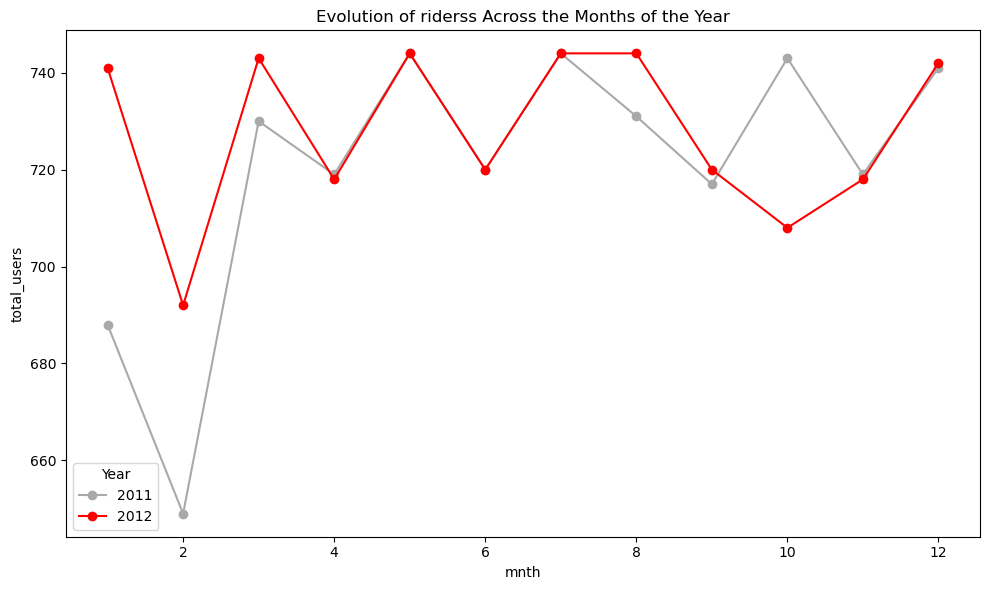

In [22]:
"""
    RIDES ALONGSIDE MONTHS FOR EACH YEAR
"""


#  by 'listed_year' and 'listed_month'
grouped_data = df3.groupby(['year', 'mnth']).size().reset_index(name='total_users')

pivot_data = grouped_data.pivot(index='mnth', columns='year', values='total_users')

plt.figure(figsize=(10, 6))
colors = {2011: 'darkgrey', 2012: 'red'}
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], marker='o',color=colors[year], label=year)


plt.xlabel('mnth')
plt.ylabel('total_users')
plt.title('Evolution of riderss Across the Months of the Year')
plt.xticks(rotation=0)
plt.legend(title='Year')


plt.tight_layout()
plt.show()
 # difference in october, check if temperatures different

#  REGISTERED VS UNREGISTERED PER MONTHS FOR EACH YEAR, AND YEAR AGAINST YEAR

In [24]:


df_2011 = df3[df3['year'] == 2011]

def calculate_statistics(df, column):
    overall_stats = {
        f'{column}_total': df[column].sum(),
        f'{column}_average': df[column].mean(),
        f'{column}_max': df[column].max(),
        f'{column}_min': df[column].min(),
    }


    overall_stats_df = pd.DataFrame([overall_stats], index=['Overall'])
    seasonal_stats = df.groupby('season').agg({
        column: ['sum', 'mean', 'max', 'min'],
    }).reset_index()
    
    total_sum = overall_stats[f'{column}_total']
    seasonal_stats[f'{column}_percentage_total_year'] = (seasonal_stats[(column, 'sum')] / total_sum * 100).round(2)

    seasonal_stats.columns = ['season'] + [f'{column}_{stat}' for stat in ['total', 'average', 'max', 'min']] + [f'{column}_percentage_total_year']

    return overall_stats_df, seasonal_stats

overall_statistics_reg, seasonal_statistics_reg = calculate_statistics(df_2011, 'registered')

display("Overall Statistics for Registered Users in 2011:")
display(overall_statistics_reg)
display("\nSeasonal Statistics for Registered Users in 2011:")
display(seasonal_statistics_reg)


overall_statistics_casual, seasonal_statistics_casual = calculate_statistics(df_2011, 'casual')
display("\nOverall Statistics for Casual Users in 2011:")
display(overall_statistics_casual)
display("\nSeasonal Statistics for Casual Users in 2011:")
display(seasonal_statistics_casual)

'Overall Statistics for Registered Users in 2011:'

,registered_total,registered_average,registered_max,registered_min
Overall,995851,115.193869,567,0


'\nSeasonal Statistics for Registered Users in 2011:'

,season,registered_total,registered_average,registered_max,registered_min,registered_percentage_total_year
0,Fall,273324,128.080600,553,1,27.45
1,Spring,269752,122.447571,555,0,27.09
2,Summer,324200,144.732143,567,0,32.56
3,Winter,128575,62.173598,393,0,12.91


'\nOverall Statistics for Casual Users in 2011:'

,casual_total,casual_average,casual_max,casual_min
Overall,247252,28.600578,272,0


'\nSeasonal Statistics for Casual Users in 2011:'

,season,casual_total,casual_average,casual_max,casual_min,casual_percentage_total_year
0,Fall,52813,24.748360,272,0,21.36
1,Spring,77564,35.208352,240,0,31.37
2,Summer,95450,42.611607,248,0,38.60
3,Winter,21425,10.360251,175,0,8.67


In [26]:
# Filter the DataFrame for the year 2012
df_2011 = df3[df3['year'] == 2012]

# Define the function to calculate overall and seasonal statistics for a specified column
def calculate_statistics(df, column):

    overall_stats = {
        f'{column}_total': df[column].sum(),
        f'{column}_average': df[column].mean(),
        f'{column}_max': df[column].max(),
        f'{column}_min': df[column].min(),
    }

    # statistics to DataFrame
    overall_stats_df = pd.DataFrame([overall_stats], index=['Overall'])

    # Group by season and statistics
    seasonal_stats = df3.groupby('season').agg({
        column: ['sum', 'mean', 'max', 'min'],
    }).reset_index()

    # percentage by season for the total year
    total_sum = overall_stats[f'{column}_total']
    seasonal_stats[f'{column}_percentage_total_year'] = (seasonal_stats[(column, 'sum')] / total_sum * 100).round(2)

    seasonal_stats.columns = ['season'] + [f'{column}_{stat}' for stat in ['total', 'average', 'max', 'min']] + [f'{column}_percentage_total_year']

    return overall_stats_df, seasonal_stats

# statistics for registered users for 2011
overall_statistics_reg, seasonal_statistics_reg = calculate_statistics(df_2011, 'registered')

display("Overall Statistics for Registered Users in 2012:")
display(overall_statistics_reg)
display("\nSeasonal Statistics for Registered Users in 2012:")
display(seasonal_statistics_reg)

# statistics for casual users for 2011
overall_statistics_casual, seasonal_statistics_casual = calculate_statistics(df_2011, 'casual')
display("\nOverall Statistics for Casual Users in 2012:")
display(overall_statistics_casual)
display("\nSeasonal Statistics for Casual Users in 2012:")
display(seasonal_statistics_casual)

'Overall Statistics for Registered Users in 2012:'

,registered_total,registered_average,registered_max,registered_min
Overall,1676811,191.986604,886,0


'\nSeasonal Statistics for Registered Users in 2012:'

,season,registered_total,registered_average,registered_max,registered_min,registered_percentage_total_year
0,Fall,711831,168.202032,876,0,42.45
1,Spring,715067,162.183488,782,0,42.64
2,Summer,835038,185.729093,886,0,49.80
3,Winter,410726,96.823668,681,0,24.49


'\nOverall Statistics for Casual Users in 2012:'

,casual_total,casual_average,casual_max,casual_min
Overall,372765,42.679757,367,0


'\nSeasonal Statistics for Casual Users in 2012:'

,season,casual_total,casual_average,casual_max,casual_min,casual_percentage_total_year
0,Fall,129782,30.666824,362,0,34.82
1,Spring,203522,46.160581,361,0,54.60
2,Summer,226091,50.287144,350,0,60.65
3,Winter,60622,14.290901,367,0,16.26


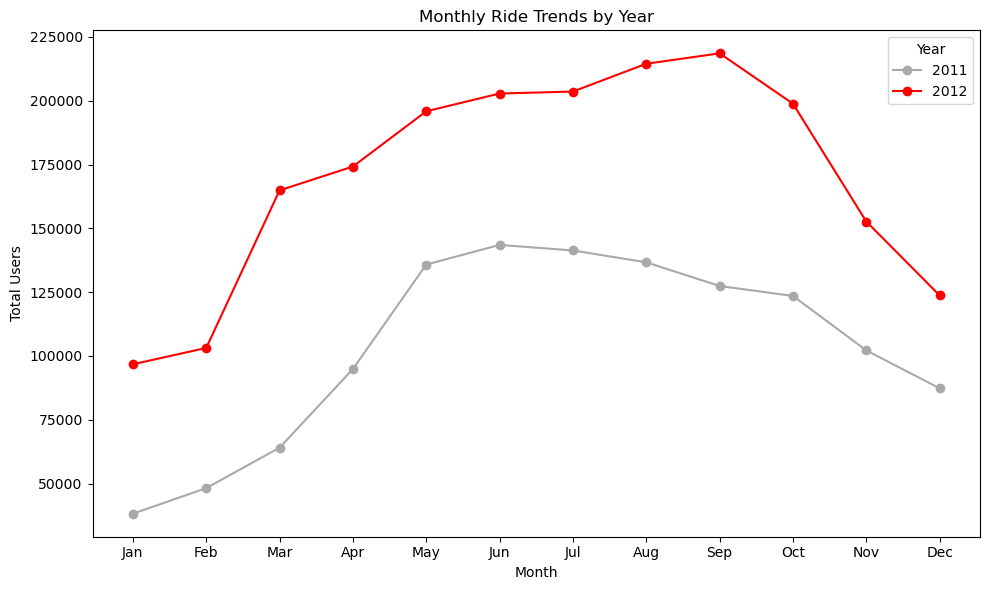

In [28]:
df4=df3.copy()
grouped_data = df4.groupby(['year', 'mnth']).agg({'total_users': 'sum'}).reset_index()


plt.figure(figsize=(10, 6))
colors = {2011: 'darkgrey', 2012: 'red'}
# Plotting the total users for each year
for year in grouped_data['year'].unique():
    year_data = grouped_data[grouped_data['year'] == year]
    plt.plot(year_data['mnth'], year_data['total_users'], marker='o',color=colors[year], label=year)

plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Monthly Ride Trends by Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')

plt.tight_layout()
plt.show()

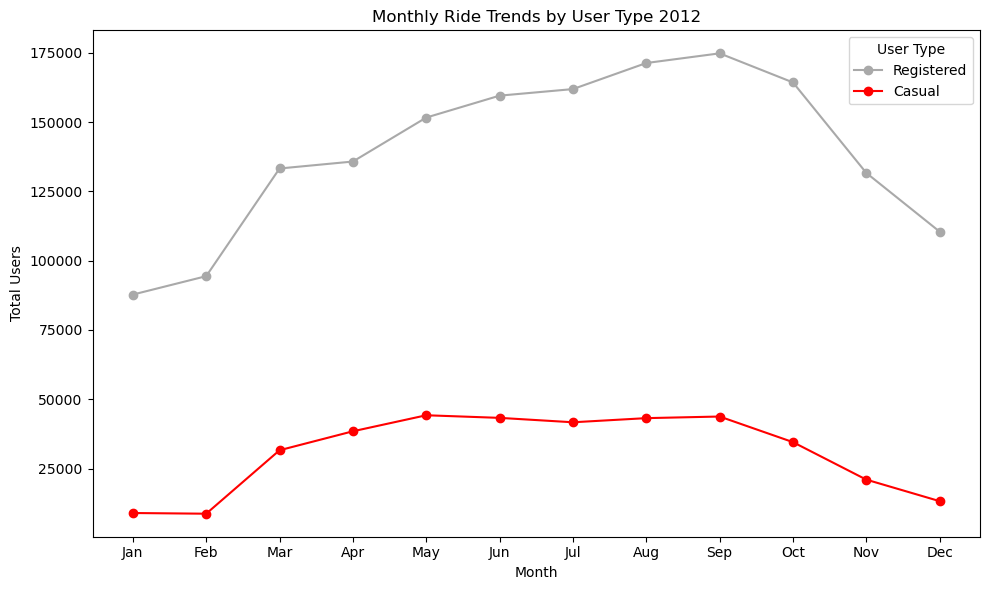

In [30]:
"""
    Total users by month  both years
    
"""
# Filter the DataFrame for the year 2012
df_total = df4[df4['year'] == 2012]

# Group the data by month and calculate  sum of 'registered' and 'not_registered' 
grouped_data = df_total.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()


plt.figure(figsize=(10, 6))

plt.plot(grouped_data['mnth'], grouped_data['registered'], marker='o', color='darkgrey',label='Registered')
plt.plot(grouped_data['mnth'], grouped_data['casual'], marker='o',color='red', label='Casual')

plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Monthly Ride Trends by User Type 2012')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='User Type')

# Display the plot
plt.tight_layout()
plt.show()

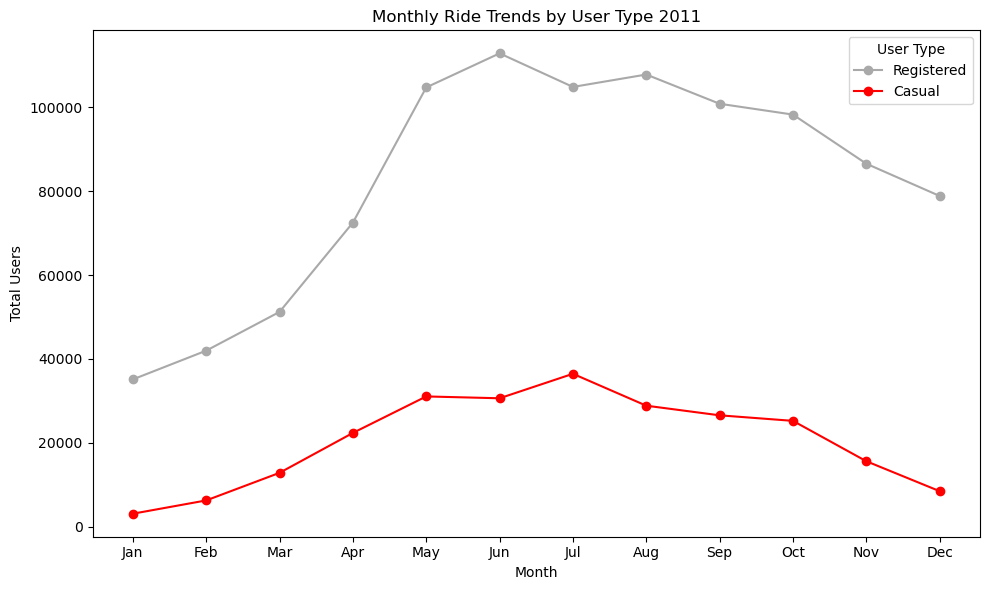

In [32]:
"""
    Monthly Ride Trends by User Type 2011
    
"""
# Filter for the year 2012
df_2011 = df4[df4['year'] == 2011]

#  Group the data by month and  sum of 'registered' and 'not_registered' users
grouped_data = df_2011.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))

plt.plot(grouped_data['mnth'], grouped_data['registered'], marker='o', color='darkgrey',label='Registered')
plt.plot(grouped_data['mnth'], grouped_data['casual'], marker='o',color='red', label='Casual')

plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Monthly Ride Trends by User Type 2011')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='User Type')

# Display the plot
plt.tight_layout()
plt.show()

# Cleaning humedity colum as %

In [ ]:
df4['hum'] = df4['hum'].mul(100)

print(df4)



# New column for days of the week

In [34]:


df4['date'] = pd.to_datetime(df4['date'])

df4['day_of_week'] = df4['date'].dt.day_name()

print(df4)
df5=df4.copy()

       index       date  season  year  mnth  hour  holiday  weekday  \
0          1 2011-01-01  Winter  2011     1     0        0        6   
1          2 2011-01-01  Winter  2011     1     1        0        6   
2          3 2011-01-01  Winter  2011     1     2        0        6   
3          4 2011-01-01  Winter  2011     1     3        0        6   
4          5 2011-01-01  Winter  2011     1     4        0        6   
...      ...        ...     ...   ...   ...   ...      ...      ...   
17374  17375 2012-12-31  Winter  2012    12    19        0        1   
17375  17376 2012-12-31  Winter  2012    12    20        0        1   
17376  17377 2012-12-31  Winter  2012    12    21        0        1   
17377  17378 2012-12-31  Winter  2012    12    22        0        1   
17378  17379 2012-12-31  Winter  2012    12    23        0        1   

       workingday  weathersit  temperature  adjusted_temperature   hum  \
0               0           1         0.24                0.2879  0.81   

# New column date_hour

In [36]:

df5['date'] = pd.to_datetime(df5['date'])

df5['date'] =df5['date'].dt.strftime('%Y-%m-%d')
df5['hour'] = df5['hour'].apply(lambda x: f'{x:02}:00')

# Create the 'date_hour' column by concatenating 'date' and 'hour'
df5['date_hour'] = df5['date'] + ' ' + df5['hour']

print(df5)
df5['date_hour'].nunique()
df6=df5.copy()

       index        date  season  year  mnth   hour  holiday  weekday  \
0          1  2011-01-01  Winter  2011     1  00:00        0        6   
1          2  2011-01-01  Winter  2011     1  01:00        0        6   
2          3  2011-01-01  Winter  2011     1  02:00        0        6   
3          4  2011-01-01  Winter  2011     1  03:00        0        6   
4          5  2011-01-01  Winter  2011     1  04:00        0        6   
...      ...         ...     ...   ...   ...    ...      ...      ...   
17374  17375  2012-12-31  Winter  2012    12  19:00        0        1   
17375  17376  2012-12-31  Winter  2012    12  20:00        0        1   
17376  17377  2012-12-31  Winter  2012    12  21:00        0        1   
17377  17378  2012-12-31  Winter  2012    12  22:00        0        1   
17378  17379  2012-12-31  Winter  2012    12  23:00        0        1   

       workingday  weathersit  temperature  adjusted_temperature   hum  \
0               0           1         0.24       

# Weathersit

In [ ]:
#weathersit : 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# more visuals

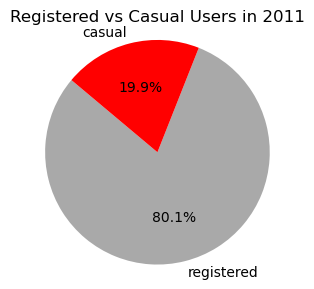

In [38]:
# registered vs casual 2011

df_2011 = df6[df6['year'] == 2011]
registered_total = df_2011['registered'].sum()
casual_total = df_2011['casual'].sum()

labels = ['registered', 'casual']
sizes = [registered_total, casual_total]
colors = ['darkgrey', 'red']

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Registered vs Casual Users in 2011')

plt.axis('equal')
plt.tight_layout()
plt.show()

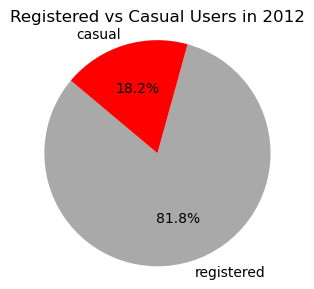

In [40]:
# registered vs casual 2012

df_2012 = df6[df6['year'] == 2012]
registered_total = df_2012['registered'].sum()
casual_total = df_2012['casual'].sum()

labels = ['registered', 'casual']
sizes = [registered_total, casual_total]
colors = ['darkgrey', 'red']


plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Registered vs Casual Users in 2012')

plt.axis('equal')
plt.tight_layout()
plt.show()

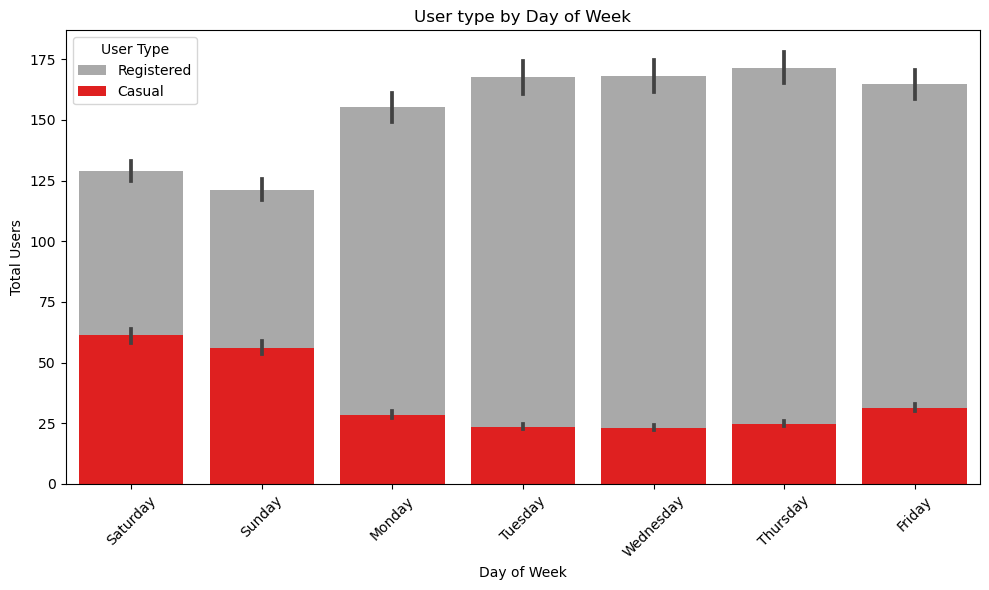

In [44]:

# Plot total users by user type and day of week
plt.figure(figsize=(10, 6))


sns.barplot(data=df6, x='day_of_week', y='registered', color='darkgrey', label='Registered')
sns.barplot(data=df6, x='day_of_week', y='casual', color='red', label='Casual')

plt.title('User type by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Users')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

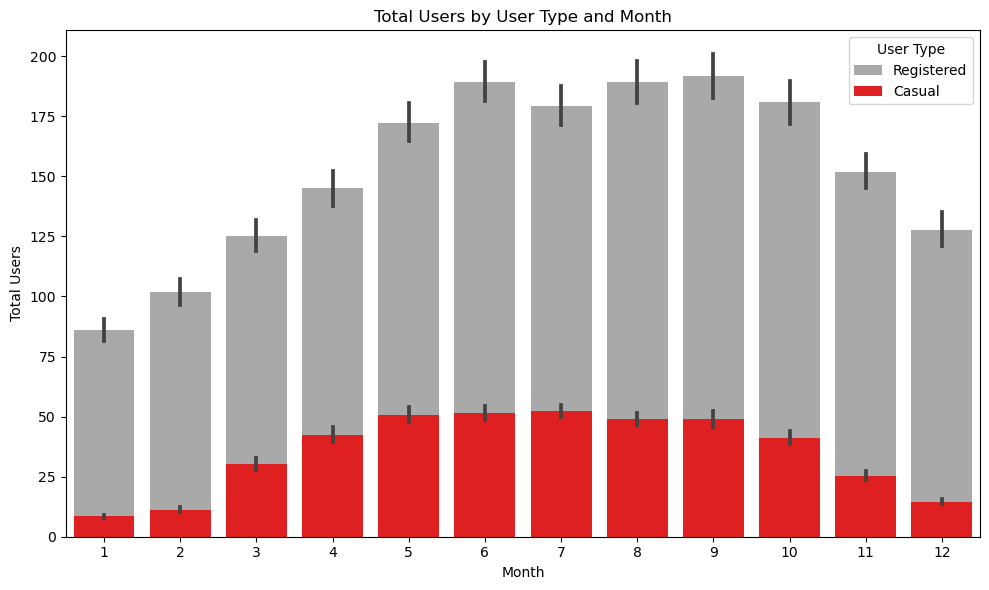

In [46]:

# Plot total users by user type and month
plt.figure(figsize=(10, 6))

sns.barplot(data=df6, x='mnth', y='registered', color='darkgrey', label='Registered')

sns.barplot(data=df6, x='mnth', y='casual', color='red', label='Casual')

plt.title('Total Users by User Type and Month')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.legend(title='User Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


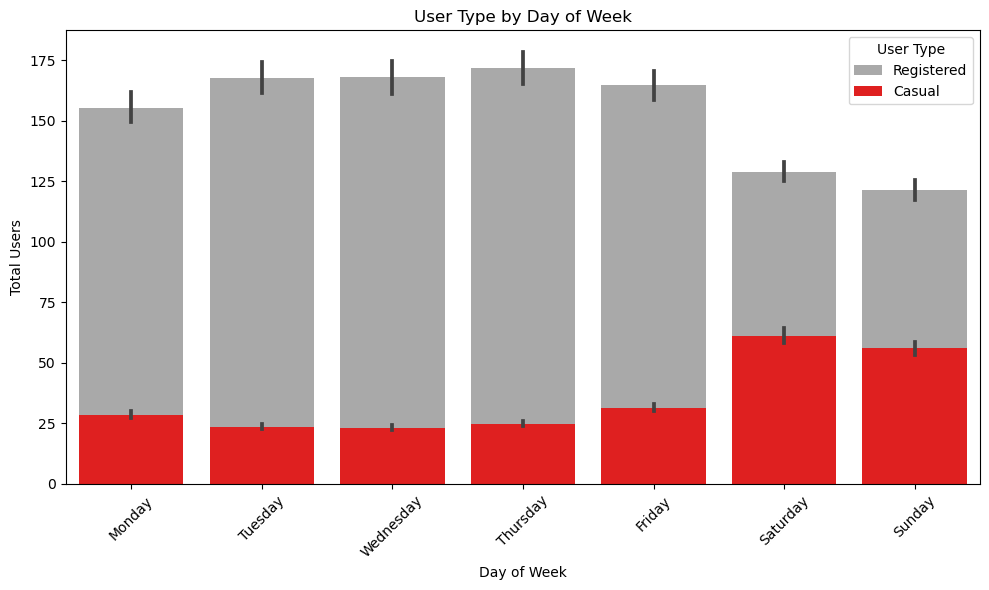

In [79]:

# Plot total users by user type and day of week
wdf = df6
wdf['date_hour'] = pd.to_datetime(wdf['date_hour'])

# Order days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wdf['day_of_week'] = pd.Categorical(wdf['day_of_week'], categories=day_order, ordered=True)

plt.figure(figsize=(10, 6))

sns.barplot(data=wdf, x='day_of_week', y='registered', color='darkgrey', label='Registered')

sns.barplot(data=wdf, x='day_of_week', y='casual', color='red', label='Casual')

plt.title('User Type by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Users')
plt.legend(title='User Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


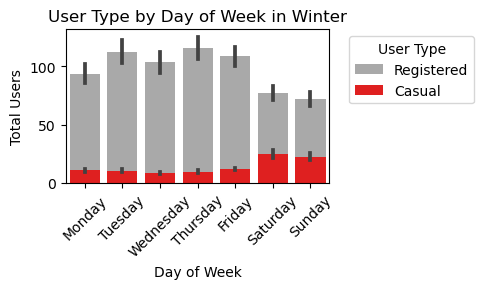

In [56]:
# By user type by days of the week for season Winter
seas_df=df6

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seas_df['day_of_week'] = pd.Categorical(seas_df['day_of_week'], categories=days_order, ordered=True)

wseas_df= seas_df[seas_df['season'] == 'Winter']

plt.figure(figsize=(5, 3))

sns.barplot(data=wseas_df, x='day_of_week', y='registered', color='darkgrey', label='Registered')

sns.barplot(data=wseas_df, x='day_of_week', y='casual', color='red', label='Casual')

plt.title('User Type by Day of Week in Winter')
plt.xlabel('Day of Week')
plt.ylabel('Total Users')

plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


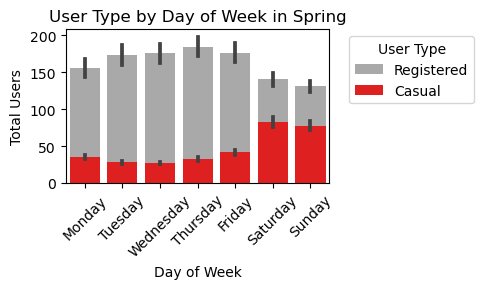

In [58]:
# By user type by days of the week for season Spring

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seas_df['day_of_week'] = pd.Categorical(seas_df['day_of_week'], categories=days_order, ordered=True)

spseas_df= seas_df[seas_df['season'] == 'Spring']

plt.figure(figsize=(5, 3))

sns.barplot(data=spseas_df, x='day_of_week', y='registered', color='darkgrey', label='Registered')

sns.barplot(data=spseas_df, x='day_of_week', y='casual', color='red', label='Casual')

plt.title('User Type by Day of Week in Spring')
plt.xlabel('Day of Week')
plt.ylabel('Total Users')

plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


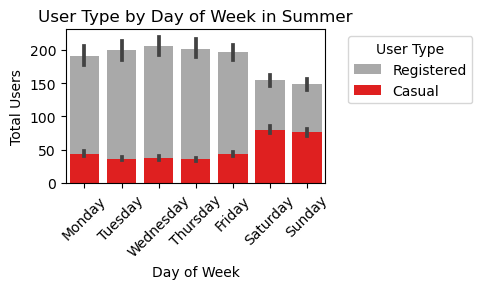

In [64]:
# By user type by days of the week for season Summer

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seas_df['day_of_week'] = pd.Categorical(seas_df['day_of_week'], categories=days_order, ordered=True)

suseas_df= seas_df[seas_df['season'] == 'Summer']

plt.figure(figsize=(5, 3))

sns.barplot(data=suseas_df, x='day_of_week', y='registered', color='darkgrey', label='Registered')

sns.barplot(data=suseas_df, x='day_of_week', y='casual', color='red', label='Casual')

plt.title('User Type by Day of Week in Summer')
plt.xlabel('Day of Week')
plt.ylabel('Total Users')

plt.legend(title='User Type', bbox_to_anchor=(1.06, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


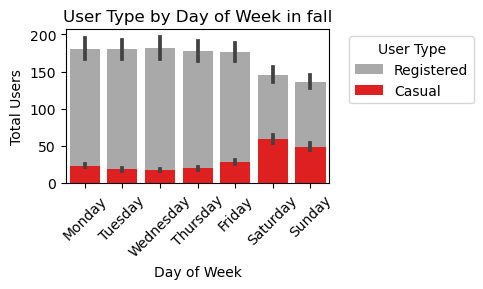

In [68]:
# By user type by days of the week for season Fall


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seas_df['day_of_week'] = pd.Categorical(seas_df['day_of_week'], categories=days_order, ordered=True)

fseas_df= seas_df[seas_df['season'] == 'Fall']

plt.figure(figsize=(5, 3))

sns.barplot(data=fseas_df, x='day_of_week', y='registered', color='darkgrey', label='Registered')

sns.barplot(data=fseas_df, x='day_of_week', y='casual', color='red', label='Casual')

plt.title('User Type by Day of Week in fall')
plt.xlabel('Day of Week')
plt.ylabel('Total Users')

plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

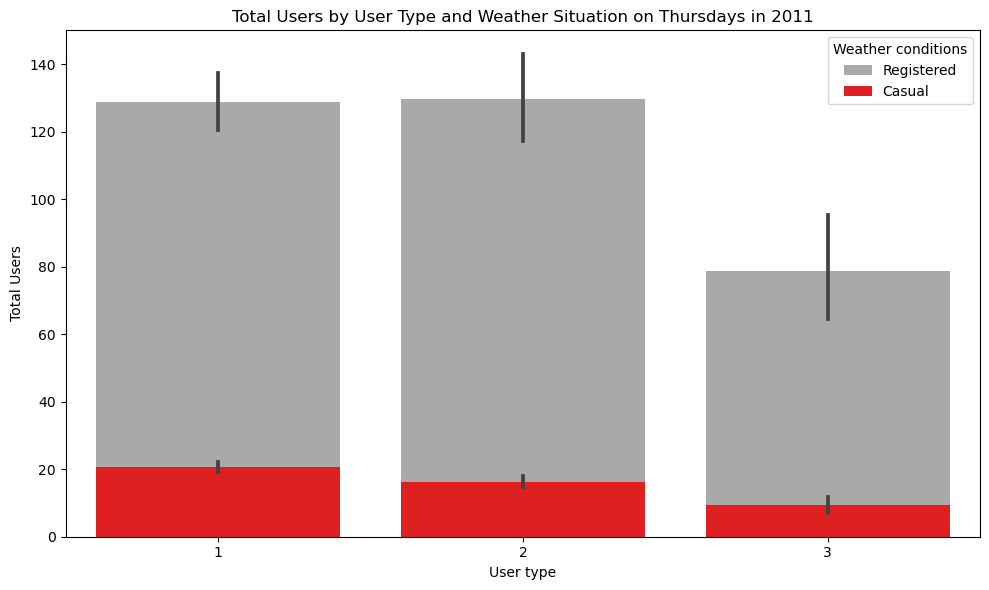

In [70]:
# taking thursday as the busiest day of the week, how diff will be  thursday depending on weather conditions

# Filter data for the year 2011 and day of the week Thursday
df_filtered = df6[(df6['year'] == 2011) & (df6['day_of_week'] == 'Thursday')]


plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered, x='weathersit', y='registered', color='darkgrey', label='Registered')
sns.barplot(data=df_filtered, x='weathersit', y='casual', color='red', label='Casual')

plt.title('Total Users by User Type and Weather Situation on Thursdays in 2011')
plt.xlabel('User type')
plt.ylabel('Total Users')
plt.legend(title='Weather conditions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df6['weathersit'].unique()

# Create csv files for each column

In [ ]:
print(df6.info())

In [ ]:
df6.info()


# Group 1: Rental
rental_columns = ['casual', 'registered', 'total_users', 'date_hour']
rental_df = df6[rental_columns]

# Group 2: Weather_conditions
weather_columns = ['hum', 'windspeed', 'adjusted_temperature', 'temperature','weathersit', 'date_hour']
weather_df = df6[weather_columns]

# Group 3: season
season_columns = ['weekday' , 'workingday', 'holiday', 'hour', 'mnth', 'year', 'season' , 'date', 'date_hour']
season_df = df6[season_columns]


print("Temperature DataFrame:")
print(rental_df)
print("\nWeather DataFrame:")
print(weather_df)
print("\nUsers DataFrame:")
print(season_df)

In [ ]:
#Rental df
folder_path = ('/Users/marina/Desktop/IRON HACK LABS/SQL')

file_name = 'rental_df.csv'


file_path = os.path.join(folder_path, file_name)

rental_df.to_csv(file_path, index=False)

print(f'DataFrame exported to {file_path}')

In [ ]:
#Weather df
folder_path = ('/Users/marina/Desktop/IRON HACK LABS/SQL')

file_name = 'weather_df.csv'

file_path = os.path.join(folder_path, file_name)

weather_df.to_csv(file_path, index=False)

print(f'DataFrame exported to {file_path}')

In [ ]:
#Season df
folder_path = ('/Users/marina/Desktop/IRON HACK LABS/SQL')

file_name = 'season_df.csv'

file_path = os.path.join(folder_path, file_name)
season_df.to_csv(file_path, index=False)

print(f'DataFrame exported to {file_path}')

In [ ]:
folder_path = ('/Users/marina/Desktop/IRON HACK LABS/SQL')
clean_bike_sharing_df=df6
file_name = 'clean_bike_sharing_df.csv'

file_path = os.path.join(folder_path, file_name)
clean_bike_sharing_df.to_csv(file_path, index=False)

print(f'DataFrame exported to {file_path}')


In [ ]:
clean_bike_sharing_df.info()